# Laboratorio 3

## Integrantes: Camila Rodríguez Águila (C36624) y Jerson Bonilla Fernández (C31225)

### 1. En este laboratorio, utilizaremos el tutorial “An introduction to Python t-tests” para aprender a realizar análisis estadísticos para comparar grupos y obtener conclusiones estadísticamente significativas. Nos enfocaremos en los t-tests para dos muestras (two sample). También utilizaremos el tutorial “A gentle introduction to normality testa in Python” para comprobar si los datos siguen una distribución gaussiana (normal).

### 2. Continuamos el análisis con la base de datos de esperanza de vida (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who). Para nuestro análisis, dividimos el planeta en 2 zonas: la zona tropical, ubicada entre el Trópico de Capricornio y el Trópico de Cáncer y la zona templada, distribuida debajo del Trópico de Capricornio y por encima del Trópico de Cáncer.

#### a.  Prepare los datos para separar los conjuntos correspondientes a la zona templada y la zona tropical.

In [ ]:
import requests
import pandas as pd

df = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
# Arreglo de errores de formato
mapeo_paises = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Iran (Islamic Republic of)': 'Iran',
    'Micronesia (Federated States of)': 'Micronesia',
    'Venezuela (Bolivarian Republic of)': 'Venezuela'
}

In [ ]:
# Obtener la lista de países únicos
lista_paises = df['Country'].unique()

# Función para obtener la latitud de un país
def obtener_latitud(pais):
    try:
        respuesta = requests.get(f'https://restcountries.com/v3.1/name/{pais}')
        data = respuesta.json()
        if data and 'latlng' in data[0]:
            return data[0]['latlng'][0]  # Retorna la latitud
        else:
            print(f'No se encontraron datos para {pais}.')
            return None
    except Exception as e:
        print(f'Error al obtener la latitud para {pais}: {e}')
        return None

# Función mejorada para obtener la latitud
def obtener_latitud_mejorada(pais):
    pais_mapeado = mapeo_paises.get(pais, pais)
    return obtener_latitud(pais_mapeado)

# Crear un diccionario para almacenar las latitudes
dic_latitudes = {}

# Obtener la latitud para cada país y almacenar en el diccionario
for pais in lista_paises:
    lat = obtener_latitud_mejorada(pais)
    dic_latitudes[pais] = lat

# Crear listas para almacenar los datos de los países tropicales y templados
zonas_tropicales = []
zonas_tempranas = []

# Recorrer el diccionario de latitudes y clasificar
for pais, latitud in dic_latitudes.items():
    if latitud is not None:  # Solo incluir si la latitud no es nula
        # Clasificar según la latitud
        if -23.4369 <= latitud <= 23.4369:  # Zona tropical
            zonas_tropicales.append(df[df['Country'] == pais])
        else:  # Zona templada
            zonas_tempranas.append(df[df['Country'] == pais])

# Convertir listas en DataFrames
df_tropicales = pd.concat(zonas_tropicales, ignore_index=True)
df_tempranas = pd.concat(zonas_tempranas, ignore_index=True)

# Imprimir los resultados
print("Países en la zona tropical:")
print(df_tropicales[['Country']])

print("\nPaíses en la zona templada:")
print(df_tempranas[['Country']])


Países en la zona tropical:
       Country
0       Angola
1       Angola
2       Angola
3       Angola
4       Angola
...        ...
1539  Zimbabwe
1540  Zimbabwe
1541  Zimbabwe
1542  Zimbabwe
1543  Zimbabwe

[1544 rows x 1 columns]

Países en la zona templada:
          Country
0     Afghanistan
1     Afghanistan
2     Afghanistan
3     Afghanistan
4     Afghanistan
...           ...
1389   Uzbekistan
1390   Uzbekistan
1391   Uzbekistan
1392   Uzbekistan
1393   Uzbekistan

[1394 rows x 1 columns]


#### b. Utilice diagramas de cajas para estudiar las distribuciones de la esperanza de vida, total expenditure y schooling de los países en las dos zonas planetarias. Debe haber una figura por cada variable y cada una debe tener las 2 cajas correspondientes a las zonas (ver https://www.reneshbedre.com/blog/anova.html para un ejemplo de gráfica).

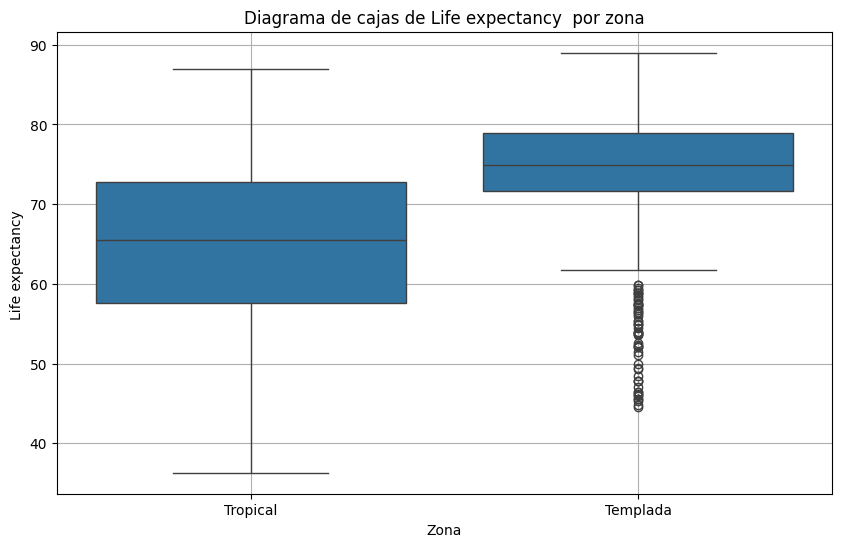

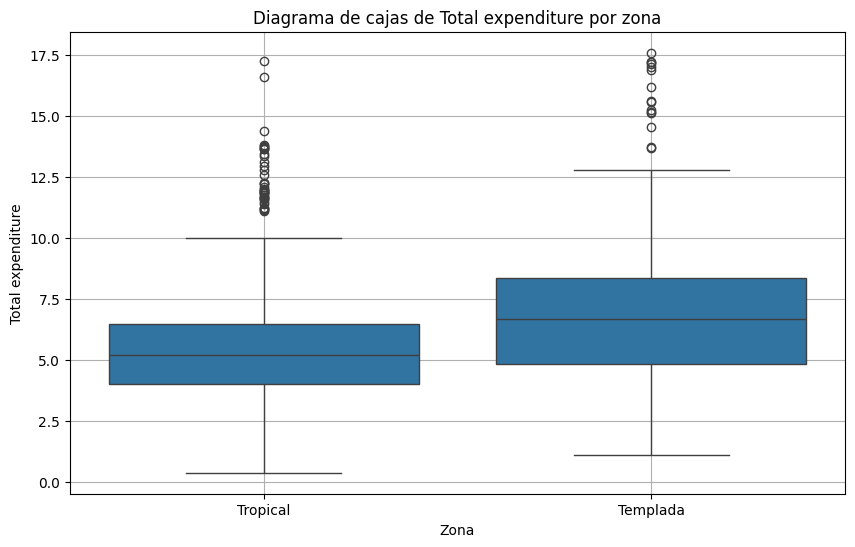

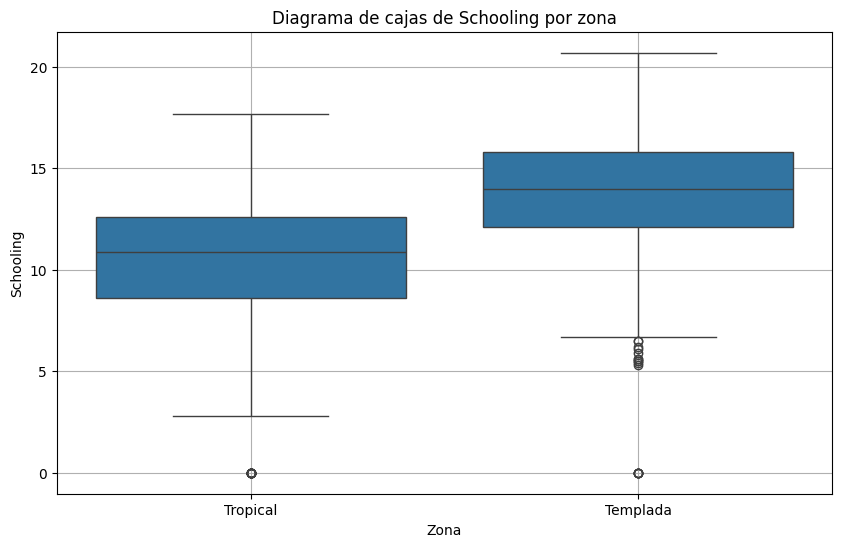

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Variables a analizar
variables = ['Life expectancy ', 'Total expenditure', 'Schooling']

# Crear diagramas de cajas
for var in variables:
    plt.figure(figsize=(10, 6))

    # Restablecer índices y asignar zona
    tropicales_reseteados = df_tropicales.reset_index(drop=True).assign(Zona='Tropical')
    templados_reseteados = df_tempranas.reset_index(drop=True).assign(Zona='Templada')

    # Juntar los DataFrames
    data_combined = pd.concat([tropicales_reseteados, templados_reseteados], ignore_index=True)

    # Verificar y eliminar duplicados
    data_combined = data_combined.drop_duplicates()

    # Crear el diagrama de cajas
    sns.boxplot(x='Zona', y=var, data=data_combined)
    plt.title(f'Diagrama de cajas de {var} por zona')
    plt.xlabel('Zona')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()


#### c. Para cada una de las 3 variables y de manera separada para cada subconjunto de datos (tropical vs. templada), realice un test de normalidad como indicado en el tutorial para saber si los datos tienen una distribución gaussiana. En total son 6 tests. Concluya si las distribuciones son normales o no.

In [ ]:
# Podemos usar la prueba de Shapiro-Wilk. Si el p-valor resultante del test es mayor a 0.05,
# podemos asumir que los datos tienen una distribución normal; de lo contrario, no son normales.
# Vamos a obtener dos valores: el estadístico y el valor p.
from scipy import stats

# Vamos a aplicar el test de Shapiro-Wilk a cada subconjunto de datos (tropical y templado) para las variables:
# Life expectancy, Total expenditure y Schooling.

# Variables a analizar
variables = ['Life expectancy ', 'Total expenditure', 'Schooling']

# Realizar el test de normalidad para cada variable en las zonas tropical y templada
for var in variables:
    print(f'\nTest de normalidad para {var}:\n')

    # Datos de la zona tropical
    datos_tropical = df_tropicales[var].dropna()  # Eliminamos NaN (valores nulos)
    stat, p = stats.shapiro(datos_tropical)
    print(f'Zona Tropical - {var}: Estadístico = {stat}, p-valor = {p}')
    if p > 0.05:
        print(f'La distribución de {var} en la zona tropical parece ser normal.')
    else:
        print(f'La distribución de {var} en la zona tropical NO parece ser normal.')

    # Datos de la zona templada
    datos_templada = df_tempranas[var].dropna()  # Eliminamos NaN
    stat, p = stats.shapiro(datos_templada)
    print(f'Zona Templada - {var}: Estadístico = {stat}, p-valor = {p}')
    if p > 0.05:
        print(f'La distribución de {var} en la zona templada parece ser normal.')
    else:
        print(f'La distribución de {var} en la zona templada NO parece ser normal.')



Test de normalidad para Life expectancy :

Zona Tropical - Life expectancy : Estadístico = 0.9643104098369245, p-valor = 5.304194723456196e-19
La distribución de Life expectancy  en la zona tropical NO parece ser normal.
Zona Templada - Life expectancy : Estadístico = 0.9331235397087131, p-valor = 1.7308977728268882e-24
La distribución de Life expectancy  en la zona templada NO parece ser normal.

Test de normalidad para Total expenditure:

Zona Tropical - Total expenditure: Estadístico = 0.9500698956062891, p-valor = 1.4372749311598919e-21
La distribución de Total expenditure en la zona tropical NO parece ser normal.
Zona Templada - Total expenditure: Estadístico = 0.9756136315346338, p-valor = 5.847266323915745e-14
La distribución de Total expenditure en la zona templada NO parece ser normal.

Test de normalidad para Schooling:

Zona Tropical - Schooling: Estadístico = 0.9536714114690925, p-valor = 3.1927989764388027e-21
La distribución de Schooling en la zona tropical NO parece ser

A partir de los resultados de los tests de normalidad, podemos concluir lo siguiente:

**Life expectancy:** En ambas zonas (tropical y templada), el valor p es extremadamente pequeño, lo que indica que la distribución de la esperanza de vida no sigue una distribución normal en ninguna de las dos zonas.

**Total expenditure:** Tanto en la zona tropical como en la zona templada, el valor p es significativamente bajo, lo que significa que la distribución del gasto total tampoco sigue una distribución normal en ninguna de las dos zonas.

**Schooling:** Al igual que con las otras variables, los valores p muy bajos en ambas zonas indican que los datos de escolaridad no siguen una distribución normal ni en la zona tropical ni en la zona templada.

**Conclusión general**

Para las tres variables estudiadas (Life expectancy, Total expenditure y Schooling), en ambos subconjuntos de datos (zona tropical y zona templada), no se cumplen los supuestos de normalidad.

#### d. Independientemente del resultado anterior, compare los grupos tropical y templada utilizando **t-tests**, para cada una de las tres variables estudiadas. Siga el enlace presentado anteriormente para investigar cómo realizar este test en Python.

In [ ]:
# Vamos a realizar un t-test de dos muestras independientes.
from scipy import stats

# Variables a analizar
variables = ['Life expectancy ', 'Total expenditure', 'Schooling']

# Realizar el t-test para cada variable en ambas zonas
for var in variables:
    # Filtrar datos válidos para zona tropical y templada (eliminar nulos)
    tropicales_validos = df_tropicales[var].dropna()
    templados_validos = df_tempranas[var].dropna()

    # Realizar el t-test
    t_stat, p_valor = stats.ttest_ind(tropicales_validos, templados_validos, equal_var=False)

    # Imprimir resultados
    print(f"t-test para {var}:")
    print(f"T-stat = {t_stat:.4f}, p-valor = {p_valor:.4f}")

    if p_valor < 0.05:
        print(f"Conclusión: Existe una diferencia estadísticamente significativa entre la zona tropical y la zona templada para {var}.\n")
    else:
        print(f"Conclusión: No se encontró una diferencia estadísticamente significativa entre la zona tropical y la zona templada para {var}.\n")


t-test para Life expectancy :
T-stat = -32.5206, p-valor = 0.0000
Conclusión: Existe una diferencia estadísticamente significativa entre la zona tropical y la zona templada para Life expectancy .

t-test para Total expenditure:
T-stat = -11.7230, p-valor = 0.0000
Conclusión: Existe una diferencia estadísticamente significativa entre la zona tropical y la zona templada para Total expenditure.

t-test para Schooling:
T-stat = -30.9500, p-valor = 0.0000
Conclusión: Existe una diferencia estadísticamente significativa entre la zona tropical y la zona templada para Schooling.



#### e. Dé una interpretación a estos resultados, con base en lo que investigó previamente en los enlaces proporcionados. Explique cuáles son las hipótesis del t-test y cómo se interpretan los resultados. ¿Hay diferencias en esperanza de vida, gasto total y escolaridad entre zonas del mundo? En caso de ser así, indique cuál de ellos tiene una media mayor.

**Interpretación de los resultados del t-test:**

Los t-tests realizados para las variables Life expectancy, Total expenditure, y Schooling entre las zonas tropical y templada revelan diferencias estadísticamente significativas. A continuación se explican las hipótesis y se incluye la interpretación de los resultados.

Hipótesis del t-test:

1. **Hipótesis nula (H<sub>0</sub>)**: Las medias de los dos grupos (zona tropical y zona templada) son iguales. Es decir, no hay una diferencia significativa en la variable entre las dos zonas. Por lo tanto: H<sub>0</sub>: μ<sub>tropical</sub> = μ<sub>templada</sub>
2. **Hipótesis alternativa (H<sub>1</sub>)**: Las medias de los dos grupos (zona tropical y zona templada) son diferentes. Es decir, hay una diferencia significativa en la variable entre las dos zonas. Por lo tanto: H<sub>1</sub>: μ<sub>tropical</sub> ≠ μ<sub>templada</sub>

El objetivo del t-test es determinar si debemos rechazar la hipótesis nula en favor de la hipótesis alternativa.

**¿Cómo interpretar los resultados?**

Si el p-valor es menor que un nivel de significancia predefinido (generalmente 0.05), se rechaza la hipótesis nula y se concluye que existe una diferencia significativa entre los grupos. Si el p-valor es mayor que 0.05, no se rechaza la hipótesis nula, lo que sugiere que no hay evidencia suficiente para afirmar que las medias de los dos grupos son diferentes.

En este caso, los valores p fueron extremadamente bajos (cercanos a 0) para las tres variables, lo que indica que existen diferencias significativas entre las zonas tropical y templada para Life expectancy, Total expenditure, y Schooling.

**Análisis de las diferencias:**

1. **Life expectancy (Esperanza de vida):** El valor negativo del estadístico T sugiere que la media de la esperanza de vida en la zona tropical es menor que la de la zona templada. Los países en la zona templada tienden a tener una mayor esperanza de vida en promedio.

2. **Total expenditure (Gasto total en salud):** El estadístico T negativo indica que el gasto total en salud es mayor en los países de la zona templada que en los de la zona tropical. Esto es coherente con la tendencia de los países más desarrollados (en su mayoría en zonas templadas) a invertir más en el sector salud.

3. **Schooling (Años de escolarización):** La escolarización también es mayor en la zona templada, como lo sugiere el valor negativo del estadístico T. Los países en la zona templada tienden a tener un sistema educativo más robusto, lo que contribuye a más años de escolaridad.

**Interpretación general**

Existe una diferencia, pues los resultados sugieren que los países en la zona templada disfrutan de condiciones de vida más favorables en términos de esperanza de vida, gasto en salud, y años de escolarización.

La esperanza de vida, el gasto total en salud, y los años de escolarización son significativamente mayores en los países de la zona templada en comparación con los de la zona tropical. Los t-tests indican que estas diferencias son estadísticamente significativas, sugiriendo que hay desigualdades notables entre estas dos zonas del mundo.

#### f. Para casos en los que no se cuenta con distribuciones normales, se pueden utilizar otras pruebas estadísticas para comparar entre grupos. El equivalente al t-test para el caso que los grupos son independientes (como en el presente laboratorio), se llama el Mann-Whitney U test. Independientemente de los resultados del test de normalidad, compare utilizando este test para determinar si hay diferencias entre grupos y, en caso de ser así, cuál de ellos tiene una media mayor. Explique los resultados.

In [ ]:
import pandas as pd
import scipy.stats as stats


# Función para realizar el test de Mann-Whitney U
def test_mann_whitney(df1, df2, variable):
    estadistica, p_value = stats.mannwhitneyu(df1[variable].dropna(), df2[variable].dropna(), alternative='two-sided')
    return estadistica, p_value

# Variables de interés
variables = ['Life expectancy ', 'Total expenditure', 'Schooling']

# Realizar pruebas de Mann-Whitney U
for var in variables:
    estadistica, p_value = test_mann_whitney(df_tropicales, df_tempranas, var)

    print(f'Test de Mann-Whitney U para {var}:')
    print(f'Estadística={estadistica:.4f}, p-value={p_value:.4f}')

    if p_value <= 0.05:
        print('Hay diferencias significativas entre los grupos.\n')
        # Determinar cuál grupo tiene la media mayor
        media_tropicales = df_tropicales[var].mean()
        media_tempranas = df_tempranas[var].mean()

        if media_tropicales > media_tempranas:
            print(f'La media de {var} en la zona tropical ({media_tropicales:.2f}) es mayor que en la zona templada ({media_tempranas:.2f}).\n')
        else:
            print(f'La media de {var} en la zona templada ({media_tempranas:.2f}) es mayor que en la zona tropical ({media_tropicales:.2f}).\n')
    else:
        print('No hay diferencias significativas entre los grupos.\n')


Test de Mann-Whitney U para Life expectancy :
Estadística=411873.5000, p-value=0.0000
Hay diferencias significativas entre los grupos.

La media de Life expectancy  en la zona templada (74.33) es mayor que en la zona tropical (64.60).

Test de Mann-Whitney U para Total expenditure:
Estadística=650623.5000, p-value=0.0000
Hay diferencias significativas entre los grupos.

La media de Total expenditure en la zona templada (6.52) es mayor que en la zona tropical (5.41).

Test de Mann-Whitney U para Schooling:
Estadística=366472.5000, p-value=0.0000
Hay diferencias significativas entre los grupos.

La media de Schooling en la zona templada (13.80) es mayor que en la zona tropical (10.40).



**Interpretación de los resultados del Mann-Whitney U test**

Hipótesis del Mann-Whitney U test:
1. **Hipótesis nula (H<sub>0</sub>)**: No hay diferencia significativa en las distribuciones de las dos poblaciones (zona tropical y zona templada). Las distribuciones de los dos grupos son iguales. Por lo tanto: H<sub>0</sub>: D<sub>tropical</sub> = D<sub>templada</sub>.
2. **Hipótesis alternativa (H<sub>1</sub>)**: Las medias de los dos grupos (zona tropical y zona templada) son diferentes. Es decir, hay una diferencia significativa en la variable entre las dos zonas. Por lo tanto: H<sub>1</sub>: D<sub>tropical</sub> ≠ D<sub>templada</sub>.

Si el p-valor es menor que 0.05, se rechaza la hipótesis nula, lo que indica que hay una diferencia significativa entre los dos grupos.

**Interpretación de los resultados:**

1. **Life expectancy (Esperanza de vida):** El p-valor es 0.0000, lo que indica que hay una diferencia estadísticamente significativa en la distribución de la esperanza de vida entre las zonas tropical y templada. La media de la esperanza de vida en la zona templada (74.33) es mayor que en la zona tropical (64.60). Esto confirma que las personas que viven en países de la zona templada, en promedio, tienden a tener una mayor esperanza de vida.
2. **Total expenditure (Gasto total en salud):** El p-valor es 0.0000, indicando una diferencia significativa en la distribución del gasto total en salud entre las zonas tropical y templada. La media del gasto total en la zona templada (6.52) es mayor que en la zona tropical (5.41). Los países de la zona templada, en promedio, invierten más en salud.
3. **Schooling (Años de escolaridad):** El p-valor es 0.0000, mostrando una diferencia significativa en los años de escolarización entre las zonas tropical y templada. La media de escolarización en la zona templada (13.80) es mayor que en la zona tropical (10.40). Esto refleja que los países en la zona templada tienden a tener un mayor acceso a la educación formal.

**Conclusión**

Los resultados del Mann-Whitney U test muestran que existen diferencias significativas entre las zonas tropical y templada en cuanto a la esperanza de vida, el gasto en salud, y los años de escolarización. En todos los casos, los países de la zona templada tienen medias más altas que los países de la zona tropical. Esto indica que, en promedio, los países en la zona templada disfrutan de una mejor calidad de vida en términos de salud y educación, lo que podría estar relacionado con factores socioeconómicos y de desarrollo.

### 3. Para esta pregunta, trabaje con el subconjunto de datos generado en el lab 2 que contiene información de la altura para distintas localidades, utilizando al menos 1000 datos (o más si así lo desea). Las bases de datos utilizadas son la de esperanza de vida, https://www.kaggle.com/datasets/max-mind/world-cities-database/ para obtener las ciudades y https://www.kaggle.com/datasets/rafiaaa/country-names-with-short-codes-a2-a3-iso para unir países con ciudades.

#### a. Grafique la esperanza de vida en función de la altitud usando un diagrama de dispersión. Recuerde que para hacer esto, no debe trazar líneas entre puntos y debe ordenar sus datos con respecto a la altitud (de menor a mayor). Comente lo que observa.

Tamaño después del primer merge (cities + countries): (3148407, 11)
                   City   Latitude  Longitude  Altitude
975988          soussac  44.729264   0.019991     109.0
189024   draxhall woods  13.133333 -59.516667     131.0
2998211          louden  39.026667 -83.452778     237.0
393202           borobo   5.165442  -3.061534      10.0
256909   rabishki vrukh  43.718333  22.548889     366.0
Tamaño después del segundo merge (con esperanza de vida): (14608, 34)


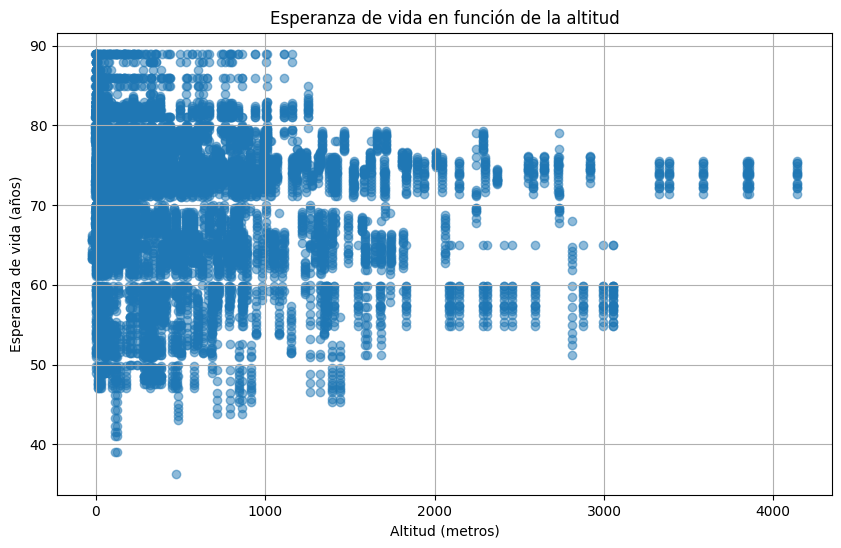

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

# Cargar las bases de datos
cities = pd.read_csv('worldcitiespop.csv', low_memory=False)
countries = pd.read_csv('country code.csv', encoding='ISO-8859-1')
life_expectancy = pd.read_csv('Life Expectancy Data.csv')

# Convertir los códigos de país de 'cities' a mayúsculas para que coincidan con los de 'countries'
cities['Country'] = cities['Country'].str.upper()

# Primer merge entre cities y countries usando el código de país (Alpha-2 code)
merged_data_1 = pd.merge(cities, countries, left_on='Country', right_on='Alpha-2 code', how='inner')
print(f"Tamaño después del primer merge (cities + countries): {merged_data_1.shape}")

# Función para obtener altitud desde la API Open-Elevation
def obtener_altitud(lat, lon):
    url = f'https://api.open-elevation.com/api/v1/lookup?locations={lat},{lon}'
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            return data['results'][0]['elevation']
        else:
            return None
    except Exception as e:
        print(f"Error obteniendo altitud para {lat}, {lon}: {e}")
        return None

# Limitar el número de ciudades para la prueba (se puede ajustar el número)
# Tomamos 1000 ciudades para la prueba, dura bastante tiempo
cities_sample = merged_data_1.sample(n=1000, random_state=42)

# Crear una nueva columna para almacenar la altitud
cities_sample['Altitude'] = cities_sample.apply(lambda row: obtener_altitud(row['Latitude'], row['Longitude']), axis=1)

# Pausa de 1 segundo entre cada solicitud para no sobrecargar la API
time.sleep(1)

# Verificar el resultado
print(cities_sample[['City', 'Latitude', 'Longitude', 'Altitude']].head())

# Segundo merge entre cities_sample (con altitud) y life_expectancy usando el nombre del país
merged_data = pd.merge(cities_sample, life_expectancy, left_on='Country_y', right_on='Country', how='inner')
print(f"Tamaño después del segundo merge (con esperanza de vida): {merged_data.shape}")

# Filtrar filas con altitud y esperanza de vida válidas
merged_data_clean = merged_data.dropna(subset=['Altitude', 'Life expectancy '])

# Crear gráfico de dispersión entre altitud y esperanza de vida
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_clean['Altitude'], merged_data_clean['Life expectancy '], alpha=0.5)
plt.title('Esperanza de vida en función de la altitud')
plt.xlabel('Altitud (metros)')
plt.ylabel('Esperanza de vida (años)')
plt.grid(True)
plt.show()

# Guardar el resultado en un CSV (opcional)
# merged_data_clean.to_csv('cities_with_altitude_life_expectancy.csv', index=False)


**Comentarios**

1. **Distribución de la esperanza de vida:** La esperanza de vida de las ciudades en la muestra (1000) varía principalmente entre 40 y 90 años, independientemente de la altitud. A pesar de que algunas ciudades se encuentran en altitudes mayores (hasta 4000 metros), no se observa un patrón claro que relacione la altitud con la esperanza de vida. Es decir, vivir en altitudes mayores no parece estar directamente asociado con un aumento o disminución en la esperanza de vida.

2. **Concentración en bajas altitudes:** La mayoría de los datos están concentrados en altitudes por debajo de los 1000 metros. En estas altitudes, se observa una gran dispersión en los valores de esperanza de vida, lo que sugiere que otros factores (más allá de la altitud) podrían estar influyendo de manera más significativa en los niveles de esperanza de vida en estas regiones.

3. **Altitudes elevadas:** A altitudes superiores a 1500 metros, hay menos ciudades, lo que podría indicar que hay menos poblaciones en esas altitudes o que los datos disponibles son más limitados. A altitudes extremas (más allá de 3000 metros), los valores de esperanza de vida se encuentran entre 55 y 80 años, pero debido a la cantidad limitada de datos en estas altitudes, no es posible concluir mucho sobre las tendencias en estas regiones.

**Conclusión preliminar:**

No parece haber una relación directa entre la altitud y la esperanza de vida, al menos en esta muestra de 1000 ciudades. Los datos sugieren que la altitud por sí sola no es un determinante importante de la esperanza de vida, y otros factores, como las condiciones socioeconómicas o el acceso a servicios de salud, probablemente tienen un impacto mayor.

#### b. Para analizar si la altitud influye en la esperanza de vida, estudiamos las distribuciones de la esperanza de vida correspondiente a las ciudades, en las categorías de altitud 0-1500 y 1500+. Realice un diagrama de cajas de la esperanza de vida en las dos categorías de altitud (2 grupos).

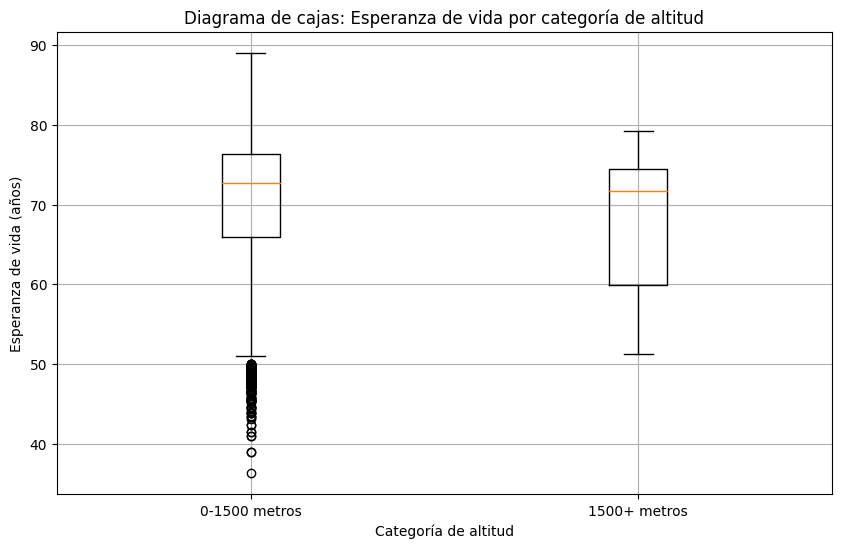

In [ ]:
# Dividir los datos en dos categorías de altitud: 0-1500 metros y 1500+ metros
grupo_1 = merged_data_clean[merged_data_clean['Altitude'] <= 1500].copy()
grupo_2 = merged_data_clean[merged_data_clean['Altitude'] > 1500].copy()

# Crear una nueva columna 'Grupo de Altitud' para etiquetar los grupos
grupo_1['Grupo de Altitud'] = '0-1500 metros'
grupo_2['Grupo de Altitud'] = '1500+ metros'

# Unir ambos grupos en un solo DataFrame
data_cajas = pd.concat([grupo_1, grupo_2])

# Crear el diagrama de cajas
plt.figure(figsize=(10, 6))
plt.boxplot([grupo_1['Life expectancy '], grupo_2['Life expectancy ']], labels=['0-1500 metros', '1500+ metros'])
plt.title('Diagrama de cajas: Esperanza de vida por categoría de altitud')
plt.ylabel('Esperanza de vida (años)')
plt.xlabel('Categoría de altitud')
plt.grid(True)
plt.show()


**Comentario**

1. **Altitud 0-1500 metros:** La mediana de la esperanza de vida está cerca de los 70-75 años. Hay una mayor dispersión en los datos, con varios outliers que están por debajo de los 50 años. El rango intercuartílico (donde se concentra el 50% de los datos) es más amplio en comparación con el grupo de 1500+ metros.

2. **Altitud 1500+ metros:** La mediana en este grupo también está alrededor de los 70-75 años. El rango intercuartílico es un poco más estrecho, lo que sugiere una menor variabilidad en la esperanza de vida en este grupo en comparación con el grupo de baja altitud. No se observan outliers en este grupo.

Hay que tomar en cuenta que se trata de una muestra de 1000 ciudades.

#### c. (Opcional) Realice un test para estudiar si los grupos siguen un distribución normal y explique.

In [ ]:
from scipy import stats

# Realizar el test de Shapiro-Wilk para los dos grupos
stat1, p_value1 = stats.shapiro(grupo_1['Life expectancy '])
stat2, p_value2 = stats.shapiro(grupo_2['Life expectancy '])

# Mostrar los resultados del test
print(f"Test de Shapiro-Wilk para el grupo 0-1500 metros:")
print(f"Estadístico = {stat1}, p-valor = {p_value1}")

if p_value1 > 0.05:
    print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal (0-1500 metros)\n")
else:
    print("Se rechaza la hipótesis nula: Los datos NO siguen una distribución normal (0-1500 metros)\n")

print(f"Test de Shapiro-Wilk para el grupo 1500+ metros:")
print(f"Estadístico = {stat2}, p-valor = {p_value2}")

if p_value2 > 0.05:
    print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal (1500+ metros)\n")
else:
    print("Se rechaza la hipótesis nula: Los datos NO siguen una distribución normal (1500+ metros)\n")


Test de Shapiro-Wilk para el grupo 0-1500 metros:
Estadístico = 0.9691005884785377, p-valor = 9.650164547543975e-47
Se rechaza la hipótesis nula: Los datos NO siguen una distribución normal (0-1500 metros)

Test de Shapiro-Wilk para el grupo 1500+ metros:
Estadístico = 0.8893922218402769, p-valor = 1.200543572178199e-25
Se rechaza la hipótesis nula: Los datos NO siguen una distribución normal (1500+ metros)



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13648.
  res = hypotest_fun_out(*samples, **kwds)


**Comentario explicativo**
Dado que los valores p de ambos grupos son extremadamente bajos, podemos rechazar la hipótesis nula en ambos casos, lo que significa que:
* El grupo de altitud 0-1500 metros no sigue una distribución normal.
* El grupo de altitud 1500+ metros no sigue una distribución normal.

**Conclusión**

Los datos de esperanza de vida en ambos grupos de altitud no siguen una distribución normal, lo cual es importante al elegir qué pruebas estadísticas utilizar para comparar los grupos. Dado que las distribuciones no son normales, es recomendable utilizar métodos no paramétricos para realizar comparaciones entre los grupos, como el test de Mann-Whitney U, que es más adecuado para comparar dos grupos independientes cuando las distribuciones no son normales.

#### d. Utilice un test estadístico (paramétrico o no paramétrico) para comparar las dos poblaciones. Explique los resultados obtenidos. ¿Hay diferencia entre los grupos? Si sí, indique cuál de los grupos tiene mayor esperanza de vida.

In [ ]:
from scipy import stats

# Realizar el test de Mann-Whitney U
stat, p_value = stats.mannwhitneyu(grupo_1['Life expectancy '], grupo_2['Life expectancy '], alternative='two-sided')

# Mostrar el resultado del test
print(f"Test de Mann-Whitney U:")
print(f"Estadístico = {stat}, p-valor = {p_value}")

# Conclusión basada en el p-valor
if p_value < 0.05:
    print("Se rechaza la hipótesis nula: Hay una diferencia significativa entre los grupos.")

    # Comparar medianas
    mediana_1 = grupo_1['Life expectancy '].median()
    mediana_2 = grupo_2['Life expectancy '].median()

    print(f"Mediana en el grupo 0-1500 metros: {mediana_1}")
    print(f"Mediana en el grupo 1500+ metros: {mediana_2}")

    if mediana_1 > mediana_2:
        print("El grupo de 0-1500 metros tiene una mayor esperanza de vida.")
    else:
        print("El grupo de 1500+ metros tiene una mayor esperanza de vida.")
else:
    print("No se rechaza la hipótesis nula: No hay diferencias significativas entre los grupos.")

Test de Mann-Whitney U:
Estadístico = 7841741.5, p-valor = 1.6148491948366254e-24
Se rechaza la hipótesis nula: Hay una diferencia significativa entre los grupos.
Mediana en el grupo 0-1500 metros: 72.7
Mediana en el grupo 1500+ metros: 71.7
El grupo de 0-1500 metros tiene una mayor esperanza de vida.


**Hipotesis:**

* Hipótesis nula (H<sub>0</sub>): No hay diferencia en la esperanza de vida entre los dos grupos.
* Hipótesis alternativa (H<sub>1</sub>): Hay una diferencia en la esperanza de vida entre los dos grupos

**Interpretación de los resultados**
El resultado del test de Mann-Whitney U muestra un valor p muy pequeño, que es menor que el umbral típico de 0.05. Esto significa que podemos rechazar la hipótesis nula. Por lo menos para esta muestra específica de 1000 ciudades. Sin embargo, la diferencia entre las medianas no es tan significativa.

Esto significa que al parecer hay una diferencia significativa en la esperanza de vida entre los dos grupos de altitud (0-1500 metros y 1500+ metros).

Aunque visualmente en el gráfico de cajas se observan algunas diferencias en la dispersión de los datos, desde un punto de vista estadístico, hay evidencia relativamente suficiente para afirmar que la altitud tiene un impacto en la esperanza de vida entre los dos grupos.

**Conclusión:**

En este análisis, se encontró una diferencia estadísticamente significativa entre las poblaciones de ciudades ubicadas en altitudes bajas (0-1500 metros) y altas (1500+ metros) en términos de esperanza de vida. Por lo tanto, se puede afirmar que uno de los grupos tiene una mayor esperanza de vida que el otro, aunque sea ligeramente. Sin embargo, esto puede variar dependiendo de la muestra tomada.